<a href="https://colab.research.google.com/github/AlexBB999/NLP/blob/master/Brian_Cosine_2_5_Similarity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HERE ARE SOME OF THE MANY PROBLEMS:**

1 - **THIS STUFF IS ALL UNSUPERVISED**

2 - **I WANTED TO DO MORE WITH CLUSTERING -- WILL DO IF TIME PERMITS**

3 - **I WANTED TO  BUILD MY OWN BERT  SUMARIZER**

4 - **I WANTED TO APPLY METRICS TO COMPARE THE SUMMARIZATIONS -- UNENDING NIGHTMARE -- SEE "ROGUE" AT THE BOTTOM -- ROGUE IS A METRIC FOR EVALUATIONG SUMMARIZATIONS (AND TRANSLATION) -- I INSTALLED IT  -- YOU WILL SEE THE ERROR WHEN I TRIED TO SCORE RESULTS ON DEMO**

5 -- **NEED  MORE VISUALS**

In [0]:
!pip install umap-learn

In [0]:
#! pip install umap-learn[plot]

In [6]:
! pip install hdbscan

     |████████████████████████████████| 4.7MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308886 sha256=b1b1be8616d96f30fb4633051cf33f2d8620a619b1d7300889f78acd076491a8
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
import pandas_profiling
#from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

In [0]:
import umap
%matplotlib inline
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [0]:
import pandas as pd
import numpy as np
import re
import json
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [0]:
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import networkx as nx

In [0]:
with open('/content/Allen2.json') as json_file:
    data2 = json.load(json_file)

**K IS THE DOCUMENT AS ONE LONG STRING**

In [0]:
k=''
for text in data2['body_text']:
  k=k+(text["text"])

In [19]:
len(k)

46281

In [20]:
k

"Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system. IFNs are extracellular cytokines specific to (jawed) vertebrates and central to host innate immunity. Upon binding of cognate receptors, they induce numerous intracellular signaling cascades, leading to transcriptional activation of several hundred genes, which altogether determine the biological outcome involving antiviral, antitumoral, and immunomodulatory effects [1] [2] [3] [4] . One gene family induced by IFNs is the double-stranded RNA-dependent 2′-5′ oligoadenylate synthetases (dsRNA-dependent OASs) in humans comprising four members, OAS1, OAS2, OAS3 and OAS-like (OASL). At least six OAS isoforms are expressed from these four human genes: two splice variants from the OAS1 and OAS2 genes and a single variant from each of the OASL and OAS3 genes [5, 6] . In comparison, the mic

**K2 BREAKS IT INTO SENTENCES**

In [0]:
k2=k.split('. ')

In [0]:
#k2

In [0]:
df_k2=pd.DataFrame(data=k2)

In [0]:
df_k2.columns=['text']

In [25]:
df_k2.shape

(287, 1)

**COUNT VECTORIZE**

In [0]:
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(df_k2)

In [0]:
count_vectorizer = CountVectorizer()
countx = count_vectorizer.fit_transform(df_k2.text)

In [28]:
countx

<287x1406 sparse matrix of type '<class 'numpy.int64'>'
	with 5917 stored elements in Compressed Sparse Row format>

**THREW DIMENSIONALITY REDUCTION IN HERE**

In [0]:
embedding = umap.UMAP(n_components=2, metric='euclidean').fit(countx)

In [0]:
embedding

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [32]:
type(embedding)

umap.umap_.UMAP

clusterer = hdbscan.HDBSCAN()

In [0]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True,prediction_data=True)

In [71]:
clusterer.fit(embedding.embedding_)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=20, min_samples=None, p=None,
        prediction_data=True)

**IT ONLY FOUND TWO CLUSTERS**

In [72]:
clusterer.labels_.max()

1

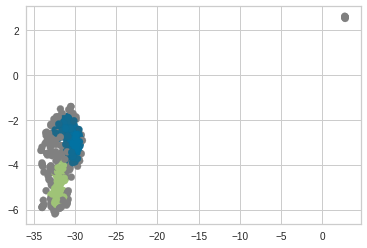

In [73]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(embedding.embedding_.T[0],embedding.embedding_.T[1], c=cluster_colors)

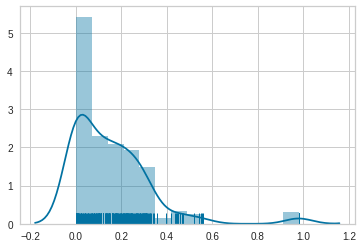

In [74]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

**RED DOTS ARE OUTLIERS**

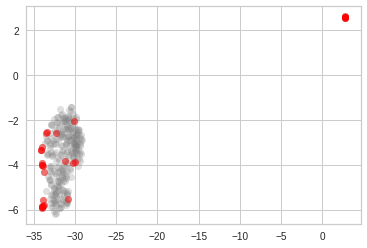

In [75]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*embedding.embedding_.T, s=50, linewidth=0, c='gray', alpha=0.25)
plt.scatter(*embedding.embedding_[outliers].T, s=50, linewidth=0, c='red', alpha=0.5)

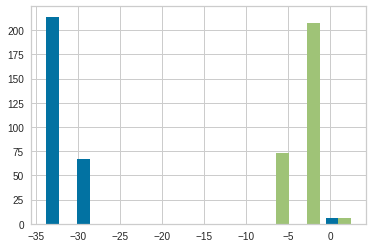

In [76]:
f = plt.hist(embedding.embedding_)

**BACK TO COUNT VECTORIZE**

In [77]:
countx

<287x1406 sparse matrix of type '<class 'numpy.int64'>'
	with 5917 stored elements in Compressed Sparse Row format>

In [0]:
doc_term_matrix = countx.todense()
df = pd.DataFrame(doc_term_matrix)

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap

#import umap.plot
%matplotlib inline

In [0]:
cs=cosine_similarity(df.values, df.values)

In [48]:
cs.shape

(287, 287)

In [0]:
 sentence_similarity_graph=nx.from_numpy_matrix(cs)
 scores = nx.pagerank(sentence_similarity_graph)

In [0]:
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)  

In [51]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)   
  print(' ') 
  print(' ')
  print('ranked sentences',ranked_sentence)
  print("Indexes of top ranked_sentence order are ", ranked_sentence)    
  #ranked_sentence

 
 
ranked sentences [(0.006336042112799102, 'The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNT

In [52]:
ranked_sentence[1]

(0.006155112816624812,
 'The specific activity of PDE12 (mole 5′-AMP synthesized per second per gram of protein (mole AMP/(sec*g)) was calculated with the formula:Total 254nm refers to the sum of the integral of all peaks in a given chromatogram at 254 nm for a single reaction, [A(pA) n ] start is the start concentration of the substrate A(pA) n, V is the reaction volume, T the reaction time and M the amount of protein added.As an example, the tetramer core substrate would be expected to undergo cleavage into the following products using PDE12 as the enzyme:In the case of purified protein, the specific enzyme activity of PDE12, E(PDE12) could therefore be calculated using the formula:For reactions including crude protein extracts, the specific enzyme activities were calculated in mmole AMP/ (sec*g of total protein)')

In [53]:
for i in range(5):
  print(ranked_sentence[i][1])

The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNTP (dATP, dCTP, dGTP or TTP) and NAD + were use

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**TF-IDF**

In [0]:
tf_vectorizer=TfidfVectorizer()
tf =tf_vectorizer.fit_transform (df_k2.text)

In [55]:
tf

<287x1406 sparse matrix of type '<class 'numpy.float64'>'
	with 5917 stored elements in Compressed Sparse Row format>

In [0]:
doc_tf_matrix = tf.todense()
df2 = pd.DataFrame(doc_tf_matrix)

In [57]:
doc_tf_matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
embedding2 = umap.UMAP(n_components=2, metric='euclidean').fit(tf)

In [82]:
clusterer.fit(embedding2.embedding_)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=20, min_samples=None, p=None,
        prediction_data=True)

**IT FOUND 0 CLUSTERS -- ALL OUTLIERS**

In [83]:
clusterer.labels_.max()

-1

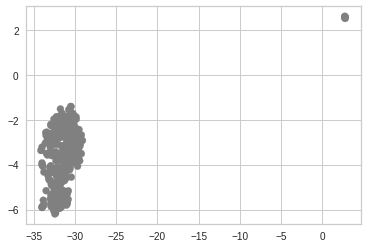

In [84]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(embedding.embedding_.T[0],embedding.embedding_.T[1], c=cluster_colors)

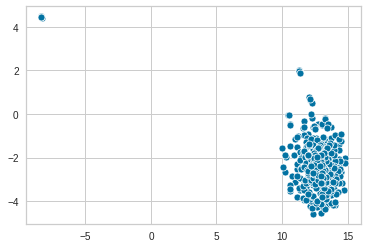

In [85]:
sns.scatterplot(embedding2.embedding_[:, 0],embedding2.embedding_[:, 1])

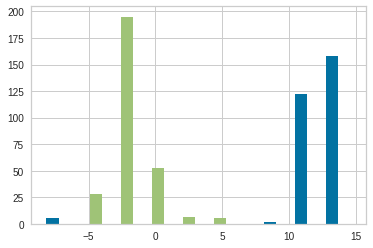

In [86]:
f = plt.hist(embedding2.embedding_)

In [0]:
cost=cosine_similarity(df2.values,df2.values)

In [0]:
 sentence_similarity_graph=nx.from_numpy_matrix(cost)
 scores = nx.pagerank(sentence_similarity_graph)

In [0]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)

In [65]:
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(k2)), reverse=True)   
  print(' ') 
  print(' ')
  print('ranked sentences',ranked_sentence)
  print("Indexes of top ranked_sentence order are ", ranked_sentence) 

 
 
ranked sentences [(0.007270650467458789, 'The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNT

In [66]:
for i in range(5):
  print(ranked_sentence[i][1])

The chromatograms were obtained using 254 nm as the absorbance wavelength.The enzyme activity reaction catalyzed by OAS can be formulated with the general formula below, in which S1 and S2 are the substrates and P the product formed: S1 þ S2 → P E, the specific activity of the enzyme (mole P generated per second per gram protein) can be calculated from the equation:[S2] start is the start conc of S2, V is the reaction volume, M is the amount of protein added and T is the reaction time.The reaction schemes for the two kinds of OAS activities measured in this paper are depicted in reaction 1 and reaction 2, respectively.In reaction 1, the specific activity of the OAS1 enzyme (E1(OAS1) with dATP and A(pA) 3 as substrates (S1 and S2, respectively) was calculated with the formula:The integral refers to the area under the individual peaks from the substrates and products in the chromatograms.Reaction 2: dNTP + NAD + → NAD − pdN In reaction 2, dNTP (dATP, dCTP, dGTP or TTP) and NAD + were use

In [0]:
#cosine_similarity(df)

with open('cosine_file.txt', 'w') as tx:
    for listitem in df_k2['text']:
        tx.write('%s\n' % listitem)

with open('cosine_file.txt', 'w') as tx2:
    tx2.write(k)

**GENSIM**

In [0]:
from pprint import pprint as print
from gensim.summarization import summarize

In [0]:
s=summarize(k,split=True,ratio=.0225)

In [0]:
len(s)

5

In [0]:
s

['The following general reaction scheme apply to the varied enzyme capabilities of the OASs: RpA + (d)NTP → PPi + RpA-(d)NMP in which the incorporation of AMP prompts for oligoadenylate synthesis by means of multiple 2′ elongation events (the other NMPs and dNMPs make up single incorporation events only).Due to low sequence specificity, RNase L degrades cellular RNA and prolonged activation results in an antiproliferative response leading to apoptosis [9] [10] [11] 16] .',
 'This assay is well-suited to assess the broader cellular role expected of the OASs, based on the very diverse substrate specificity in vitro.Human OAS1 p42 containing an N-terminal His-tag (His-OAS1) cloned in the pET9d bacterial expression vector was a kind gift from Kineta (formerly Illumigen Biosciences).The plasmid was transformed into the E.coli BL21 (DE3) strain and plated on selective LB agar (50 μg/mL ampicillin), followed by inoculation of single colonies to selective LB medium for incubation at 37°C for 1

**xxxxxXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**

##**BERT**

In [0]:
! pip install bert-extractive-summarizer

In [0]:
from summarizer import Summarizer
model = Summarizer()
result = model(k, min_length=30,ratio=.01)
full = "".join(result)

In [0]:
full

"Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system. We calculated the specific enzyme activity of the human OAS1 p42 for production of A(pA) 3 pdA to be 1.1 mmole/(sec*g).We also made additional set-ups and optimized the assay using alternative 'acceptor' and 'donor' molecules as substrates for the OAS (Fig. Indeed our estimates are higher, which may reflect the different sources of OAS used, i.e. human versus rabbit, the strategy undertaken for analyzing product formation, i.e. anion-exchange chromatography versus thin-layer chromatography, or simply that we have used dNTPs over NTPs in the reactions."

In [0]:
f=full.split('. ')

In [0]:
f

['Background 5′-triphosphorylated, 2′-5′-linked oligoadenylate polyribonucleotides (2-5As) of the structure pppA(pA) n where n ≥ 1, are the key components of the interferon (IFN)induced antiviral 2-5A system',
 "We calculated the specific enzyme activity of the human OAS1 p42 for production of A(pA) 3 pdA to be 1.1 mmole/(sec*g).We also made additional set-ups and optimized the assay using alternative 'acceptor' and 'donor' molecules as substrates for the OAS (Fig",
 'Indeed our estimates are higher, which may reflect the different sources of OAS used, i.e',
 'human versus rabbit, the strategy undertaken for analyzing product formation, i.e',
 'anion-exchange chromatography versus thin-layer chromatography, or simply that we have used dNTPs over NTPs in the reactions.']

**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX**X

**TRYING TO INSTALL + USE ROGUE**

In [0]:
! pip install git+https://github.com/tagucci/pythonrouge.git

  Cloning https://github.com/tagucci/pythonrouge.git to /tmp/pip-req-build-o1do0_9e
  Running command git clone -q https://github.com/tagucci/pythonrouge.git /tmp/pip-req-build-o1do0_9e
  Created wheel for pythonrouge: filename=pythonrouge-0.2-cp36-none-any.whl size=285402 sha256=f5950b2a66b7a6dba97cbddf2b22e15d11ff3db82b835e56f20cc57524c3e1ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-nehhtucz/wheels/fd/ff/be/6716935d513fa8656ab185cb0aa70aed382b72dda42bf09c95
Successfully built pythonrouge


In [0]:
import pythonrouge

In [0]:
from pythonrouge.pythonrouge import Pythonrouge

# system summary(predict) & reference summary
summary = [[" Tokyo is the one of the biggest city in the world."]]
reference = [[["The capital of Japan, Tokyo, is the center of Japanese economy."]]]

# initialize setting of ROUGE to eval ROUGE-1, 2, SU4
# if you evaluate ROUGE by sentence list as above, set summary_file_exist=False
# if recall_only=True, you can get recall scores of ROUGE
rouge = Pythonrouge(summary_file_exist=False,
                    summary=summary, reference=reference,
                    n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                    recall_only=True, stemming=False, stopwords=True,
                    word_level=True, length_limit=True, length=50,
                    use_cf=False, cf=95, scoring_formula='average',
                    resampling=True, samples=1000, favor=True, p=0.5)
#score = rouge.calc_score()

In [0]:
rouge.calc_score()

CalledProcessError: ignored